<a href="https://colab.research.google.com/github/UdayFirake/Supervised_ML-Regression-Appliances_Energy_Prediction/blob/main/Supervised_ML_Regression_Appliances_Energy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** - <font color="red"> **Appliances Energy Prediction**



##### **Project Type**    - <font color= "green">Regression
##### **Contribution**    - <font color= "chocolate">Individual

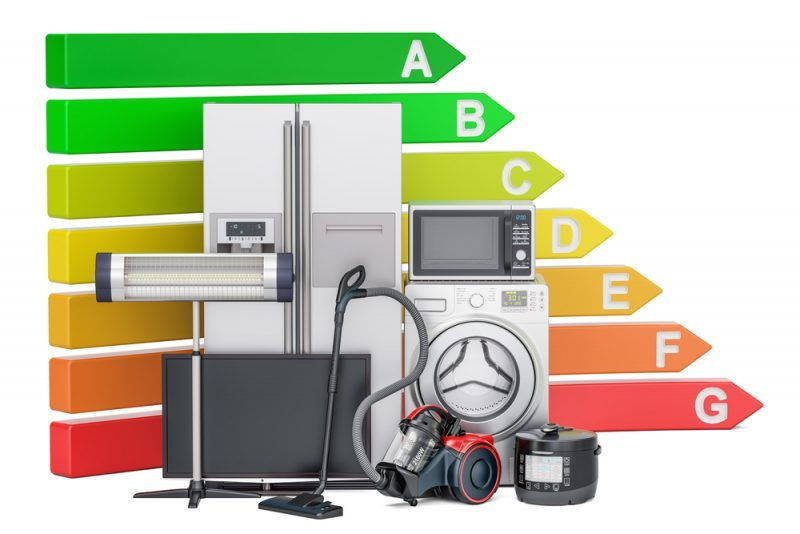

# **Project Summary -**



In this time of global uncertainty world needs energy and in increasing quantities to support economic and social progress and build a better quality of life, in particular in developing countries. But even in today’s time there are many places especially in developing world where there are outages. These outages are primary because of excess load consumed by appliances at home. Heating and cooling appliances takes most power in house. In this project we will be analysing the appliance usage in the house gathered via home sensors. All readings are taken at 10 mins intervals for 4.5 months. The goal is to predict energy consumption by appliances. In the age of smart homes, ability to predict energy consumption can not only save money for end user but can also help in generating money for user by giving excess energy back to Grid (in case of solar panels usage). In this case regression analysis will be used to predict Appliance energy usage based on data collected from various sensors.

Appliances Energy Dataset is providing the very useful information over 29 features including the datapoints on Visibility, Atmospheric Pressure, Windspeed and Dewpoint of surrounding area. We all know the relation between the surrounding temperature and household energy consumption pattern in various regions of world. For eg. In South India the Diuranal temperature change is low and revolves around 3-4 degrees. The perinial temperature is high and hence they might require cooling equipments more fequently. Hence incresing their energy consumption. This relationship have been expressed in the Appliances Energy Dataset. In the Project we are going to perform a EDA to deep dive into the trends hidden in the Data. In addition with it we are going to perform the Linear Regression model to predict the basic energy consumption by the Appliances. In this project we are finding the relationship between 28 features in response with one dependent variable, so that we could be more accurate while performing the Predictions.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters).

Along with building model, will look in some feature behaviour.

1. How is the relationship between temperature and humidity ?

2. what is monthly average temperature inside and outside ?

3. What is the temperature fluctuation in each room ?

4. What is daily wind speed and visibiity ?

5. How was visibility with outside temperature?

6. What is the mean comparison of all the features with every other feature?

7. What is the Energy Consumption by Appliances per month?

8. What is the Energy Consumption by Appliances per day arranged according to months?

9. What is the Energy consumption for individual hour of day in total 4.5 months?

10. On which day of the week, the energy consumption is highest?



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as miss
from numpy import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.model_selection import GridSearchCV ,RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import *
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install plotly.express
import plotly.express as px

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
aep_df = pd.read_csv('/content/drive/MyDrive/Capstone Projects/Capstone Project 2 :- Appliance Energy Prediction/data_application_energy.csv')

### Dataset First View

In [ ]:
# Dataset First Look
aep_df.head()

In [ ]:
aep_df.tail()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print('The number of rows in dataset is =',(aep_df.shape[0]))
print('The number of columns in dataset is =',(aep_df.shape[1]))

### Dataset Information

In [ ]:
# Dataset Info
aep_df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print('There are total',aep_df.duplicated().sum(), 'duplicate columns.')

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
aep_df.isnull().sum()

In [ ]:
# Visualizing the missing values
miss.bar(aep_df)

### What did you know about your dataset?

There are total 29 features. Out of which 'Appliances' is our dependent variable.

Data set have 19735 rows and 29 columns.

There are no duplicate columns.

There are no null values.

From above head and tail it is seen that data in rv1 and rv2 are similar.

The datatype is mixed and not so specific.



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
aep_df.columns

In [ ]:
# Dataset Describe
aep_df.describe()

## Data Description

* **date** - time year-month-day hour:minute:second
* **Appliances** - energy use in Wh (Dependent variable)
* **lights** - energy use of light fixtures in the house in Wh (Drop this column)
* **T1** - Temperature in **kitchen** area, in Celsius
* **RH1** - Humidity in **kitchen** area, in % 
* **T2** - Temperature in **living room** area, in Celsius 
* **RH2** - Humidity in **living room** area, in %
* **T3** - Temperature in **laundry** room area
* **RH3** - Humidity in **laundry** room area, in % 
* **T4** - Temperature in **office room**, in Celsius 
* **RH4** - Humidity in **office room**, in %
* **T5** - Temperature in **bathroom**, in Celsius
* **RH5** - Humidity in **bathroom**, in % 
* **T6** - Temperature **outside the building** (north side), in Celsius
* **RH6** - Humidity **outside the building** (north side), in %
* **T7** - Temperature in **ironing room**, in Celsius
* **RH7** - Humidity in **ironing room**, in % 
* **T8** - Temperature in **teenager room** 2, in Celsius 
* **RH8** - Humidity in **teenager room** 2, in %
* **T9** - Temperature in **parents room**, in Celsius
* **RH9** - Humidity in **parents room**, in % 
* **T_out** - Temperature outside (from Chievres weather station), in Celsius 
* **Pressure** - (from Chievres weather station), in mm Hg RHout 
* **Humidity** - outside (from Chievres weather station), in %
* **Wind speed** - (from Chievres weather station), in m/s
* **Visibility** - (from Chievres weather station), in km
* **Tdewpoint** - (from Chievres weather station), Â°C
* rv1 - Random variable 1, nondimensional
* rv2 - Random variable 2, nondimensional

### Variables Description 

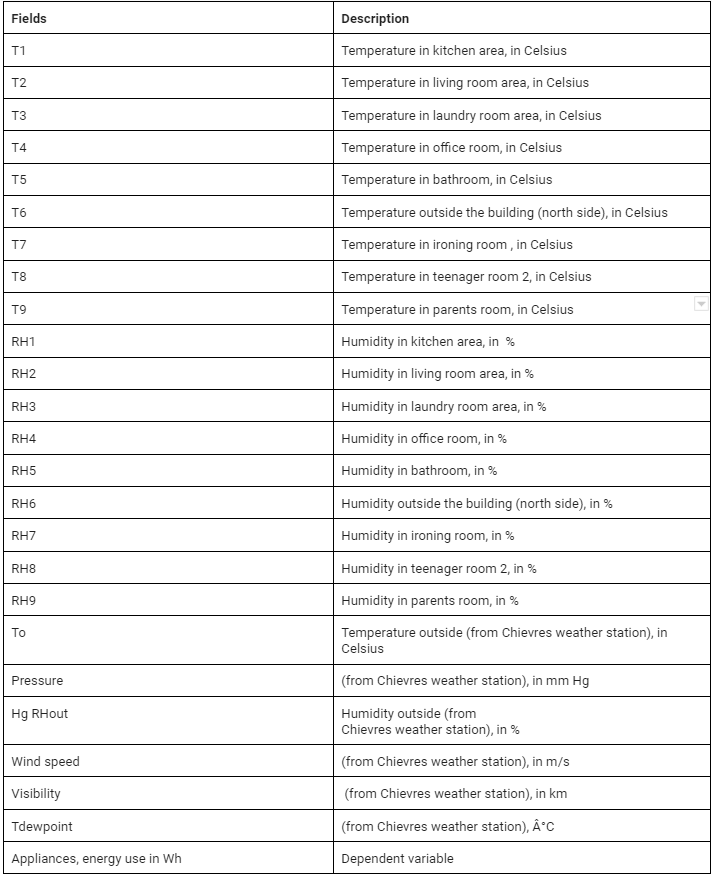

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in aep_df.columns:
  print("Number of unique values in",i,"is",aep_df[i].nunique(),".")

## ***3. Data Wrangling***

### Data Wrangling Code

#### The Function for calculating the outliers.

In [ ]:
def cal_out(df):
  '''The Following piece of code is calculating the outliers for every feature
     and replacing it with null values, so that by calling the null values we could easily find the number of  oultiers.'''
  
  for i in df.columns:
    sort = df[i].sort_values()
    Q1 = np.percentile(sort , 25 , interpolation='midpoint')
    Q2 = np.percentile(sort , 50 , interpolation='midpoint')
    Q3 = np.percentile(sort , 75 , interpolation='midpoint')

    IQR = Q3 - Q1
    
    Lower_limit = Q1 - (1.5 * IQR)
    Upper_limit = Q3 + (1.5 * IQR)
    
    for j in df[i]:
      if ((j > Upper_limit) or (j < Lower_limit)) :
        third_df[i].replace( j , np.nan,inplace = True)
  
  return third_df

In [ ]:
# Write your code to make your dataset analysis ready.
aep_df.head()

#### Renaming The Columns according to the Variable Description.

In [ ]:
aep_df.rename(columns={'T1': 'kitchen', 'RH_1':'hu_Kitchen', 'T2':'living_room', 'RH_2': 'hu_living', 'T3':'Laundry_room',
       'RH_3':'hu_laundry', 'T4':'office_room', 'RH_4':'hu_office', 'T5':'bathroom', 'RH_5':'hu_bath', 'T6':'build_out'
       , 'RH_6':'hu_build_out', 'T7':'ironing_room', 'RH_7':'hu_ironing_room', 'T8':'teen_room',
       'RH_8':'hu_teen', 'T9':'parents_room', 'RH_9':'hu_parent', 'T_out':'temp_out', 'RH_out':'out_humidity'},inplace = True)

In [ ]:
aep_df.head()

####What is the mean comparison of all the features with every other feature ?

In [ ]:
# I have made a empty DF first with reqired name of columns and then done with the other functionalities.
mean = pd.DataFrame(columns=['features','mean'])
mean['features']=['Appliances', 'lights', 'kitchen', 'hu_Kitchen', 'living_room',
       'hu_living', 'Laundry_room', 'hu_laundry', 'office_room', 'hu_office',
       'bathroom', 'hu_bath', 'build_out', 'hu_build_out', 'ironing_room',
       'hu_ironing_room', 'teen_room', 'hu_teen', 'parents_room', 'hu_parent',
       'temp_out', 'Press_mm_hg', 'out_humidity', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2']

In [ ]:
# for calculating the mean, I have created the empty dataframe first and then used the following code to arrange the mean for every feature.
for j,i in enumerate(mean['features']):
    mean['mean'][j]=aep_df[i].mean()

print(mean) 

The mean values shows the most probable instantaneous values of that variable. It helps to understand the present context of that variable. For e.g The mean temp of kitchen shows the most probable daily temp of kitchen.

The most astonishing fact is the mean of temperature oustside is near about 7.5 degrees which is very low.

In our studies we got to know that we are studying the temperature values in the month of jan,feb,march,april and may.We also know that these months are not this much cold in Asian countries but in Belgium, the temperature might decrease.

####Splitting date time Based on year.

In [ ]:
# extracting year from date column.
aep_df['year']=pd.DatetimeIndex(aep_df['date']).year

In [ ]:
# lets see the count of years.
aep_df.groupby(['year'])['year'].count()

All the data is from the year 2016.

So there is no need to have the specific column for that,
Droping year column.

In [ ]:
# droping year column from dataset.
aep_df.drop('year',axis=1,inplace=True)

####What is the Energy Consumption by Appliances per month?

In [ ]:
aep_df['date'] = pd.to_datetime(aep_df['date'])
aep_df.info()

In [ ]:
aep_df['month']=aep_df['date'].dt.month
aep_df['month_name']=aep_df['date'].dt.month_name()

In [ ]:
month_df=aep_df.groupby('month_name')['Appliances'].sum().reset_index()
month_df

####Splitting date time Based on days.

In [ ]:
# extracting day from date column.
aep_df['date'] = pd.to_datetime(aep_df['date'])
aep_df['day']=aep_df['date'].dt.day
day_df=aep_df.groupby(['month_name','day'])['Appliances'].sum().reset_index()
day_df

In [ ]:
print(day_df[day_df['Appliances']==day_df['Appliances'].max()])
print(day_df[day_df['Appliances']==day_df['Appliances'].min()])

The month of April shows highest energy consumption on 4 day of the month.

Whereas on 28th of january has minimum energy consumption by appliances.

The month of march shows the highest energy consumption by Appliances. Though it is slightly high from april, march has high consumption.

####The required manipulaton to find the trends between all the temperatures and humidity with target variable.

In [ ]:
temp_df = aep_df[[i for i in mean['features'] if i not in ['hu_Kitchen','hu_living','hu_laundry','hu_office','hu_bath','hu_build_out',
                                                             'hu_ironing_room','hu_teen','hu_parent','out_humidity','Press_mm_hg',
                                                             'out_humidity','Windspeed','Visibility','Tdewpoint']]]

In [ ]:
temp_df

### What all manipulations have you done and insights you found?

1. Splitting date columns into year, months.
2. It will help in analysing the data on the bases of months, days and hours.
3. Dropped date and year columns due to no further use of them.
4. Renaming of some features, for better understanding and readibility.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - DIstribution plot of all the features.

In [ ]:
# Chart - 1 visualization code
for i in mean['features']:
  
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (aep_df[i])
  sns.distplot(aep_df[i],color = 'g')
  ax.axvline(feature.mean(),color='b', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(i)
 
  plt.show()

##### 1. Why did you pick the specific chart?

Answer - To check the distribution of the features, seaborn's distplot is the best choice.

##### 2. What is/are the insight(s) found from the chart?

Answer - 1.From the plot it has been found out that, some features are nearly normally distributed but some are filled with skewedness.

2.Appliances,Lights,visibility and Windspeed are filled with skewdness, hence applying the transformation is required for them.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer - The insights will help to build the more accurate ML model.

#### Chart - 2 - Square root transformation of all the features

In [ ]:
# Chart - 2 visualization code
for i in mean['features']:
  sns.distplot(np.sqrt(aep_df[i]),color='c')
  plt.show()

##### 1. Why did you pick the specific chart?

Answer - In this chart transformation have been applied to move the features towards more normally distributed.

##### 2. What is/are the insight(s) found from the chart?

Answer - 1.Applying the transformation have reduced the skewedness in the features.

2.More specifically due to uncompatibility of feature lights with log transformation I have used the sqaure root transformation.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer - Square root transformation have reduced the skewedness and helped to buil more accurate regression model.

#### Chart - 3 - These graph shows the variation of all the temperature related features with the dependent variable.

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(10,8))
for i in temp_df:
  if  i != 'Appliances':

    sns.lineplot(x='Appliances', y=i,
              
              data=temp_df)
    
    plt.show()
    plt.figure(figsize=(10,8))

##### 1. Why did you pick the specific chart?

Answer - Line plot is useful to detect any type of linearity in our features.

##### 2. What is/are the insight(s) found from the chart?

Answer - 1.The lines for near about all the columns shows the same pattern.

2.It might be due to the same kind of realtionship of independent variables with target variable.

3.If the trends with target variable is same for all the independent variable, then it could lead us towards multicolinearity.

4.Think like if trends of target and independent variable is same for all the features, then all the independent features might share some kind of similarity, which we could refer as multicolinearity.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer - The graph inclining us towards some kind of similarity in independent variable.

#### Chart - 4 - Scatterplot of all the independent variables with dependent variables.

In [ ]:
# Chart - 4 visualization code
for i in mean['features']:
  if i != 'Appliances':
    g = sns.JointGrid(data=aep_df[mean['features']], x="Appliances", y=i, space=0, ratio=17)
    g.plot_joint(sns.scatterplot, size=aep_df["kitchen"], sizes=(30, 120),
              color="m", alpha=.6, legend=False)
    g.plot_marginals(sns.rugplot, height=1, color="m", alpha=.6)

##### 1. Why did you pick the specific chart?

Answer - In the above plot, I have plotted evry feature with the target variable. Here, the features are plotted against the 'Appliances' column.

##### 2. What is/are the insight(s) found from the chart?

Answer - 1.The graphs shows, arrangement of some features and appliances are very much neutral and purely scattered. But the Lights column is showing somewhat relationship with the target variable.

2.Otherwise the arrangement of scatterpoints are compatible for regression analysis as it do not show any specific arrangement with the target variable.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 5 - Visualization for the mean of all the features.

In [ ]:
# Chart - 5 visualization code
mean.iloc[21]
mean1=mean.copy().drop(21)
mean1

In [ ]:
fig = px.bar(mean1, x='features', y='mean',color='features')
fig.update_layout(width=1000,height=600)
fig.show()

##### 1. Why did you pick the specific chart?

Answer - Bar chart help to understand the trends of multiple feature at once.

##### 2. What is/are the insight(s) found from the chart?

Answer - 1.From the visualizaton graph, we can estimate the on an average range of temperature and humidity for all the features.

2.In addition with it, other features like atmospheric pressure ,windspeed, tdewpoint also shows the average normal values.For e.g the mean of atmospheric pressure is near about 756 atm, which is approximately equivalent to the noraml atmospheric pressure which is 760 atm.

3.The datapoint showing the value for mean atm. pressure has been removed while plotting the bar chart because it is too high. Hence the plot was imbalanced and hence for simplicity of graph it has been removed.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer - It helps in understanding the standard normal values of all the features.

#### Chart - 6 - 

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(10,8))
for i in temp_df:
  sns.lineplot(x='Appliances', y=i,
             
             data=temp_df)
  
  plt.show()
  plt.figure(figsize=(10,8))

Now this graph is showing the same kind of trends. But this visualization is helping us for collecting information only for humidity related features.

#### Chart - 7 - Extract weekday, Month from date columns.

In [ ]:
# Chart - 7 visualization code.
aep_df["date"]=aep_df["date"].astype("datetime64")

In [ ]:
# extract weekday from date column.
aep_df["weekday"]=aep_df["date"].dt.weekday

In [ ]:
# strip plot of Appliances(Wh) vs weekday.
plt.figure(figsize=(12,8))
sns.stripplot(x="weekday",y="Appliances",data=aep_df,color="r")
plt.xlabel("weekday",size=12)
plt.ylabel("Appliances (Wh)",size=12)

In [ ]:
# extract month from date column.
aep_df["month"]=aep_df["date"].dt.month

In [ ]:
# strip plot of Appliances(Wh) vs Month.
plt.figure(figsize=(12,8))
sns.stripplot(x="month",y="Appliances",data=aep_df)
plt.xlabel("months",size=12)
plt.ylabel("Appliances (Wh)",size=12)

##### 1. Why did you pick the specific chart?

Answer - It displays small, simple graphs in a strip to help you trace causality quickly by showing the causes or uses of a variable. The strip graph plots a single variable on each graph of the strip and shows behavior for each loaded dataset.

##### 2. What is/are the insight(s) found from the chart?

Answer - As see in graph almost all the weedays from Monday to Friday has less energy consumption as compare to weekends and all the month from january to may has same energy consumption.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 8

In [ ]:
# Chart - 8 visualization code
day_df

In [ ]:
fig = px.bar(day_df, x="day", y="Appliances",
             
             color="month_name",barmode="relative")
fig.update_layout(width=1000,height=600)
fig.show()

##### 1. Why did you pick the specific chart?

Answer - It shows the colorful variation of all the days in five months.

##### 2. What is/are the insight(s) found from the chart?

Answer - 1.The month of April shows highest energy consumption on the 4th day of the month.

2.Whereas on 28th of january has minimum energy consumption by appliances.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer - By understanding the day wise energy consumption, the companies could understand the exact behavioural pattern of their consumers.

#### Chart - 9 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
fig, ax = plt.subplots(1,1,figsize=(18,18))
sns.heatmap(aep_df.corr(),cmap='BuPu', ax=ax, annot=True)

##### 1. Why did you pick the specific chart?

Answer - A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses that is why I prefer to used correlatix matrix for better understanding of data.

##### 2. What is/are the insight(s) found from the chart?

Answer - 1.Temperature — All the temperature variables from T1-T9 and T_out have positive correlation with the target Appliances . For the indoor temperatures, the correlations are high as expected, since the ventilation is driven by the HRV unit and minimizes air tempera-ture differences between rooms. Four columns have a high degree of correlation with T9 — T3,T5,T7,T8 also T6 & T_Out has high correlation (both temperatures from outside) . Hence T6 & T9 can be removed from training set as information provided by them can be provided by other fields.

2.Weather attributes — Visibility, Tdewpoint, Press_mm_hg have low correlation values

3.Humidity — There are no significantly high correlation cases (> 0.9) for humidity sensors.

4.Random variables have no role to play The random variables rv1, rv2 and Visibility, Tdewpoint, Press_mm_hg have low correlation with the target variable.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer - A correlation matrix is a table which displays the correlation between variables. For example, it tells you whether a rise in fuel prices affects the rate of groceries. Once a relationship is ascertained, it helps businesses make business decisions accordingly.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer - 1.I want to check how much percentage of Appliances in this four months have consumed greater than the mean energy consumption.

2.So my Null hypothesis is 50 % or more of Appliances have consumed more than or equal to mean of total energy consumption.

3.Alternate Hypothesis is, Not more than 50% of Appliances consumed the greater energy than its mean.

4.P --> Proportions of Appliances H0: P >= 50 HA: P <= 50

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
''' For analysing the Null Hypothesis I am using the Proportion method.
    As the H0 is asking for 50% or more proportion of appliances energy consumption
    is more than its mean, we will require to extract a random sample and perform the testing.'''
    
'''first step, extracting the Dataset'''
appliance_rand= aep_df['Appliances'].sample(1000) 

'''As we require to work on mean'''
appliance_rand_mean= appliance_rand.mean()
appliance_rand_mean

'''Now we require to find out the existing proportion in our random sample.
   Proportion of such entries where Appliances have consumed more energy than its mean'''

more_mean=[]
for i in appliance_rand:
  if i > appliance_rand_mean:
    more_mean.append(i)
P = (len(more_mean)/len(appliance_rand))
print(P)
'''Now this is the proportion of random sample, shows proportion of appliances where energy consumption is more than mean.'''

NameError: ignored

In [ ]:
''' As our Null Hypothesis asking for 50% of entries, Our proportion for population will be 50'''

P_popu = 0.5   #proportion for population
N = len(appliance_rand)
Z_score = P-P_popu/np.sqrt(P*(1-P)/N)
print(f'Z_score is {Z_score}')

P_Value= norm.cdf(Z_score,0,1)
print(f'P_value is {P_Value}')

if P_Value > 0.05:
  print('Null Hypothesis can not be rejected as P_value is greater than significance level of 0.05 .')
else :
  print('Null Hypothesis can be rejected as P_value is lower than significance level of 0.05 .')

In [ ]:
#Cross evaluating the Null Hypothesis
'''Now if we calculate the proportion directly from our population then we could find the following results.'''

more_mean=[]
for i in aep_df['Appliances']:
  if i > aep_df['Appliances'].mean():
    more_mean.append(i)
P = (len(more_mean)/len(aep_df['Appliances']))
print(P)
if P> 0.5 :
  print( 'The proportion of datapoints which consume more energy than its mean is more than 50%.')
else :
  print( 'The proportion of datapoints which consume more energy than its mean is less than 50%.')

##### Which statistical test have you done to obtain P-Value?

Answer - 1.I have calculated the Z statistics for given proportion, and then find its P_value, by using normal cumulative distribution function with the mean and standard deviation of random sample.

2.The significance level is 0.05


##### Why did you choose the specific statistical test?

Answer - Z statistics gives the exact values for evealuating the hypothesis. It can be easily compared with its critical values.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer - 1.The second Hypothesis for Temperature in Kitchen.

2.Null Hypothesis says the mean temperature in kitchen is greater than normal room temperature.

3.Alternate hypothesis says the temperature in Kitchen is at max room temperature and it can not be above it.

4.R --> Normal room temperature T --> Mean of Kitchen temperature H0: T > R HA: T <= R


#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
''' For analysing the Null Hypothesis I am using the mean method.
    As the H0 is asking, whether the mean temperature of kitchen is more than 
    Normal room temperature or not, we will perform the test on random samples.
    As the samples should be random always I am not using seed here. So the hypothesis could
    evaluate different samples everytime.'''
    
'''first step, extracting the Dataset'''
kitchen_rand= aep_df['kitchen'].sample(1000) 

'''As we require to work on mean'''
kitchen_rand_mean= kitchen_rand.mean()
print(kitchen_rand_mean)
'''Following would be the mean of random samples.'''

In [ ]:
''' The mean and Normal room temperature has to be tested via Z_statistic'''

NRT = 20 #Normal room temperature

std_popu = aep_df['kitchen'].std()# the standard deviation for population

deno= std_popu/np.sqrt(1000)  # This is the denominator part of final formula. I calculated here for easy execution.

Z_stat = ((kitchen_rand_mean - NRT)/(std_popu/np.sqrt(N)))
print(f'Z_score is {Z_stat} ')

P_value2=norm.cdf(Z_stat,0,1)
print(f'P_value is {P_value2} ')

if P_value2 > 0.05:
  print('The Null Hypothesis can not be rejected')
else:
  print('The Null Hypohesis can be rejected')

##### Which statistical test have you done to obtain P-Value?

Answer - 1.I have calculated the Z statistics for given proportion, and then find its P_value, by using normal cumulative distribution function with the mean and standard deviation of random sample.

2.The significance level is 0.05


##### Why did you choose the specific statistical test?

Answer - Z statistics gives the exact values for evealuating the hypothesis. It can be easily compared with its critical values.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
print(aep_df.isnull().sum())

# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(aep_df.isnull(), cbar=False)

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer - There are no missing values to handle in this dataset.

### 2. Handling Outliers

In [ ]:
columns=[i for i in aep_df.columns if i not in ['date','month_name', 'weekday']]
columns

In [ ]:
# Handling Outliers & Outlier treatments
aep_df1= aep_df[columns].apply(zscore)
aep_df1

In [ ]:
for i in aep_df1.columns:
  for j in aep_df1[i]:
    if j > 3 or j < -3 :
      aep_df1[i].replace( j , np.nan , inplace = True) 
# Replacing the outliers with the null value makes their calling vey easy.

In [ ]:
for i in aep_df1.columns:
  Z=aep_df1[i].isnull().sum()
  print(f'the null values in {i} are {Z} ')

The above piece of codes are first converting the dataframe values to zscore and then evaluting them in the range of -3 to +3.

If the value lies out of the range then the method would consider it as outlier.

After running the test, feature have ommitted large number of otliers.


#### Outlier Treatment by Inter quartile range.

In [ ]:
aep_df2 = aep_df[columns].copy()

In [ ]:
for i in aep_df2.columns:
  sort = aep_df[i].sort_values()
  Q1 = np.percentile(sort , 25 , interpolation='midpoint')
  Q2 = np.percentile(sort , 50 , interpolation='midpoint')
  Q3 = np.percentile(sort , 75 , interpolation='midpoint')

  IQR = Q3 - Q1
  
  Lower_limit = Q1 - (1.5 * IQR)
  Upper_limit = Q3 + (1.5 * IQR)
  
  for j in aep_df[i]:
    if ((j > Upper_limit) or (j < Lower_limit)) :
      aep_df2[i].replace( j , np.nan,inplace = True)

In [ ]:
for i in aep_df2.columns:
  Z=aep_df2[i].isnull().sum()
  print(f'the null values in {i} are {Z} ')

The above piece of codes are finding the various percentile of the individual feature and then calibarating it with its inter quartile range, to find out the outliers.

Here also the outliers have reaplced by null values.So that they could again replace with their mean.


#### Replacement of outliers cum null values by their mean.

In [ ]:
aep_df3 = aep_df2.copy()

In [ ]:
for i in mean['features']:
  mean_list = aep_df[i].mean()
  aep_df3[i].replace( np.nan ,mean_list,inplace = True )

### 3. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
aep_df3.columns

In [ ]:
plt.figure(figsize= ( 20 , 10))
correlation = aep_df3.corr()
sns.heatmap(abs(correlation), annot=True, cmap='hot')

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
independent_variable =[i for i in aep_df3.columns if i not in ['Appliances']]
dependent_variable = 'Appliances'

### 4. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, following code gives a list of features which are skew symmetric and not balanced.

In [ ]:
# Transform Your data
symmetric_col=[]
skew_symmetric=[]
for i in aep_df3.columns:
  if abs(aep_df3[i].mean() - aep_df3[i].median()) > 0.1:
    skew_symmetric.append(i)
  else:
    symmetric_col.append(i)

print(f'Syemmetric columns are {symmetric_col} ')
print(f'skew_symmetric columns are {skew_symmetric} ')

In [ ]:
# ploting the distribution plot for all the skew-symmetric features

for i in aep_df3[skew_symmetric].columns:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (aep_df3[i])**0.25
  sns.distplot(feature,color='y')
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='b', linestyle='dashed', linewidth=2)
  ax.set_title(i)
plt.tight_layout()
plt.plot()

### 5. Dimesionality Reduction

#### Do you think that dimensionality reduction is needed? Explain Why?

Answer - 1.The Dataset contains highly correlated feature and they are not getting treated propelry by feature engineering or feature selection. 

2.The Variance inflation factor shows the feature coefficients are higly inflated. e.g kitchen temperature feature

In [ ]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(aep_df3[independent_variable])
pca = PCA()
pca.fit(X_imputed)
pca_df = pca.transform(X_imputed)

In [ ]:
aep_df3.dropna(inplace=True)
pca.fit(aep_df3[independent_variable])
pca_df = pca.transform(aep_df3[independent_variable])


In [ ]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(aep_df3[independent_variable])
pca_df = pca.transform(aep_df3[independent_variable])
# X_test_trf= pca.transform(X_test1)

In [ ]:
plt.figure(figsize=(20,13))
correlation = pd.DataFrame(pca_df).corr()
sns.heatmap(abs(correlation), annot=True, cmap='copper')

#### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer - As I have tried and tested for reducing the  various components of Dataset, the accuracy was maximum for the present model, Hence I have not decided the number of components but I have considered all the features to be tested upon.

### 6. Data Splitting

In [ ]:
model_df = pd.DataFrame(pca_df,columns=aep_df3[independent_variable].columns)
X_train ,X_test,Y_train,Y_test = train_test_split(model_df.values,aep_df3[dependent_variable].values)
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# these list stores the values of tested models.
Model=[]
train_accu=[]
test_accu=[]

In [ ]:
# ML Model - 1 Implementation
reg= LinearRegression()

# Fit the Algorithm
reg.fit(X_train,Y_train)

# Predict on the model
y_pred = reg.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
train_accuracy = reg.score(X_train,Y_train)
test_accuracy = r2_score(Y_test,reg.predict(X_test))
print('Train accuracy for the given Linear_regression is ',train_accuracy)
print('Test accuracy for the given Linear_regression is ',test_accuracy)

In [ ]:
Model.append('Linear_Regression')
train_accu.append(reg.score(X_train,Y_train))
test_accu.append(r2_score(Y_test, reg.predict(X_test)))

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
lasso = Lasso()
# Fit the Algorithm

'''Hyperparameter tuning for Lasso regression'''

parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3 )
lasso_regressor.fit(X_train, Y_train)
# Predict on the model
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

In [ ]:
lasso_best=Lasso(alpha= 0.0001)
lasso_best.fit(X_train, Y_train)


In [ ]:
train_accuracy = lasso_best.score(X_train,Y_train)
test_accuracy = r2_score(Y_test,lasso_best.predict(X_test))
print('Train accuracy for the given Lasso_regression is ',train_accuracy)
print('Test accuracy for the given Lasso_regression is ',test_accuracy)

In [ ]:
Model.append('Lasso_Regression')
train_accu.append(train_accuracy)
test_accu.append(test_accuracy)

##### Which hyperparameter optimization technique have you used and why?

Answer - For cross validation I have used GridSearchCv, as it is the best suitable method for finding the hyperparameter values.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer - Very negligible amount of change have been apper after the cross validation.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
DTR=DecisionTreeRegressor(max_depth=12)
DTR.fit(X_train,Y_train)

In [ ]:
train_accuracy = DTR.score(X_train,Y_train)
test_accuracy = r2_score(Y_test,DTR.predict(X_test))
print('Train accuracy for the given DTR is ',train_accuracy)
print('Test accuracy for the given DTR is ',test_accuracy)

In [ ]:
Model.append('DecisionTreeRegressor')
train_accu.append(train_accuracy)
test_accu.append(test_accuracy)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
DTR_CV= DecisionTreeRegressor()
# Fit the Algorithm
param_grid = {
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

## Comment in order to publish in kaggle.
grid_cv_DTR = GridSearchCV(DTR_CV, param_grid, cv=5)
# Predict on the model
grid_cv_DTR.fit(X_train,Y_train)


In [ ]:
grid_cv_DTR.best_params_

In [ ]:
DTR_best=DecisionTreeRegressor(max_depth= 60,max_leaf_nodes=700,min_samples_leaf= 5,min_samples_split=10)
DTR_best.fit(X_train,Y_train)

In [ ]:
train_accuracy = DTR_best.score(X_train,Y_train)
test_accuracy = r2_score(Y_test,DTR_best.predict(X_test))
print('Train accuracy for the given model DecisionTreeRegressor_CV is ',train_accuracy)
print('Test accuracy for the given model DecisionTreeRegressor_CV is ',test_accuracy)

In [ ]:
Model.append('DecisionTreeRegressor_cv')
train_accu.append(train_accuracy)
test_accu.append(test_accuracy)

#### Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer - The model says, training datapoints are 78% accurately predicted and the unseen testing datapoints are 44% accurately predicted

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
XGBR=XGBRegressor()
# Fit the Algorithm
XGBR.fit(X_train,Y_train)
# Predict on the model

In [ ]:
train_accuracy = XGBR.score(X_train,Y_train)
test_accuracy = r2_score(Y_test,XGBR.predict(X_test))
print('Train accuracy for the given model XGBRegressor is ',train_accuracy)
print('Test accuracy for the given model XGBRegressor is ',test_accuracy)

In [ ]:
Model.append('XGBRegressor')
train_accu.append(train_accuracy)
test_accu.append(test_accuracy)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Answer - 1.The XGboost Regressor have helped me to bring my test accuacy atleast upto the desired level of consideration.

2.This model shows near about 86% accuracy for train data and 60% of accuracy in test data.


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
XGBR_CV =XGBRegressor()

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

grid_cv_XGBR = RandomizedSearchCV(XGBR_CV, param_distributions=params, 
                                   n_iter=5, scoring='roc_auc',
                                   n_jobs=4, cv=5, verbose=3, random_state=1001 )

grid_cv_XGBR.fit(X_train,Y_train)
# Predict on the model

In [ ]:
grid_cv_XGBR.best_params_

In [ ]:
XGBR_best=XGBRegressor(min_child_weight= 10,max_depth= 12,gamma=0.1)
XGBR_best.fit(X_train,Y_train)

In [ ]:
train_accuracy = XGBR_best.score(X_train,Y_train)
test_accuracy = r2_score(Y_test,XGBR_best.predict(X_test))
print('Train accuracy for the given model XGBRegressor_CV is ',train_accuracy)
print('Test accuracy for the given model XGBRegressor_CV is ',test_accuracy)

In [ ]:
Model.append('XGBRegressor_cv')
train_accu.append(train_accuracy)
test_accu.append(test_accuracy)

In [ ]:
y_pred=XGBR_best.predict(X_test)

In [ ]:
#Visualizing the Evaluated Model

plt.figure(figsize=(12,7))
plt.plot(y_pred[:25], label='predicted')
plt.plot(Y_test[:25], label='actual')
plt.legend(loc='best')
plt.title('XGBRegressor')

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer - 1.After the hyper parameter tuning the XGboost have increased its accuracy on both test data and test data.

2.it has increased from 92 to 98% for train data and for test it has increased from 60% to 62%. which is very less improvememnt.


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer - 1.r2 score are the more inclined towards correct evaluation.

2.r2 score calculates the relative error in comparison with other metrics like RMSE which calculates the absolute error.



### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer - XGboost is most important for the businesses because it is more close towards correct prediction, in comparison with other ML Model.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
coef=pd.DataFrame(reg.coef_,index=independent_variable).rename(columns={0:'Features'})

In [ ]:
coef.plot(kind = "barh")
plt.title("Coefficients in the XGB Model")

Answer - 1.It has been observed that ,the temperature outside and temperature at parents room are contributing the most significance to the model. In addition with it dew point feature also contributing a significant amount of importance to the model.

2.The minute feature and windspeed feature are reducing the values.

3.This expresses the importance of outside temperature while operating the internal appliances. The Arctic countries generally use high energy in their houses due to presence of freezing cold outside.



# **Conclusion**

**1. The Linear Regression Model for pedicting the appliances energy shows the  31% accuracy for training dataste and 29% for testing accuracy.**

**2. The Lasso and Ridge Regularization do not show much significant improvement over the normal Linear Regression.**

**3. The Decision Tree Regressor have shown a significant improvement for both train and test accuracy. It shows 75% accuracy for training Dataset an 40% accuracy for the testing Dataset. But still the model is very less in its accuracy.**

**4. So Extreme Gradient Boost Regressor is turn to be most significant model here with highest train and test accuracy , 86% and 60% respectively.**

**5. It is turn out to be that the Temperature outside the building, temperature of parents room and Dewpoint contributes for maximum significance while calculating the model.**

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***

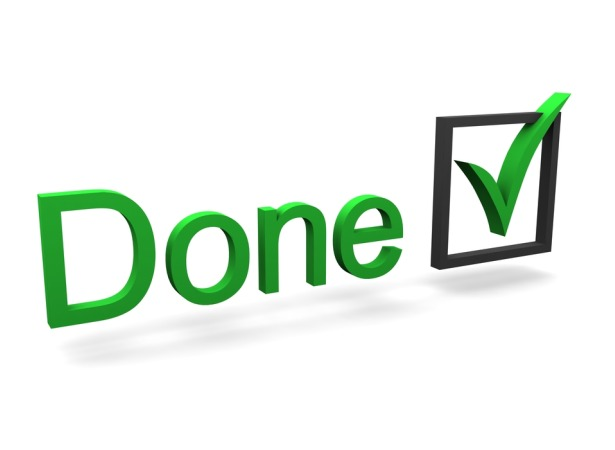